In [26]:
###                         Setup and Data Exploration

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# For better output readability
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
sns.set(style='whitegrid')

# checking current directory 
import os
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\burra


In [2]:
# Loading Dataset
df = pd.read_csv('Downloads/Fraud.csv')

#
print(f"Dataset shape: {df.shape}")
print(f"Columns:\n{df.columns}")


df.head()

Dataset shape: (6362620, 11)
Columns:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Data types and missing values 
print("Data Info:")
df.info()

# Summary statistics for numerical variables
print("\nNumerical Summary:")
display(df.describe())

# Summary statistics for categorical variables
print("\nCategorical Summary:")
display(df.describe(include=['object']))

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Numerical Summary:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00



Categorical Summary:


,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


Fraudulent Transaction Counts:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraudulent Transaction Percentage:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


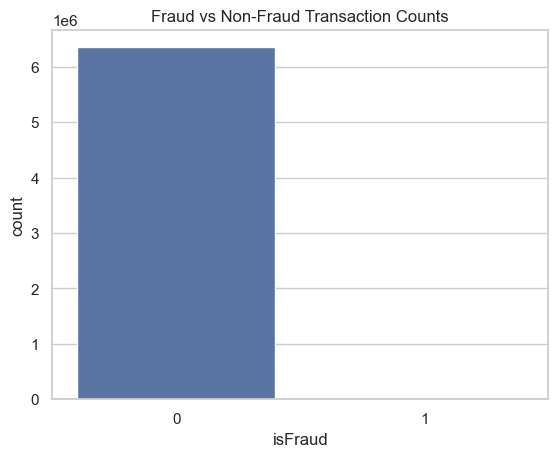

In [4]:
# Count and percentage of fraudulent vs non-fraudulent

fraud_counts = df['isFraud'].value_counts()
fraud_percent = df['isFraud'].value_counts(normalize=True) * 100

print("Fraudulent Transaction Counts:")
print(fraud_counts)
print("\nFraudulent Transaction Percentage:")
print(fraud_percent)


sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Counts')
plt.show()

In [ ]:
####                 Data Cleaning (Handling Missing Values, Outliers, Multicollinearity)

Missing values per column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


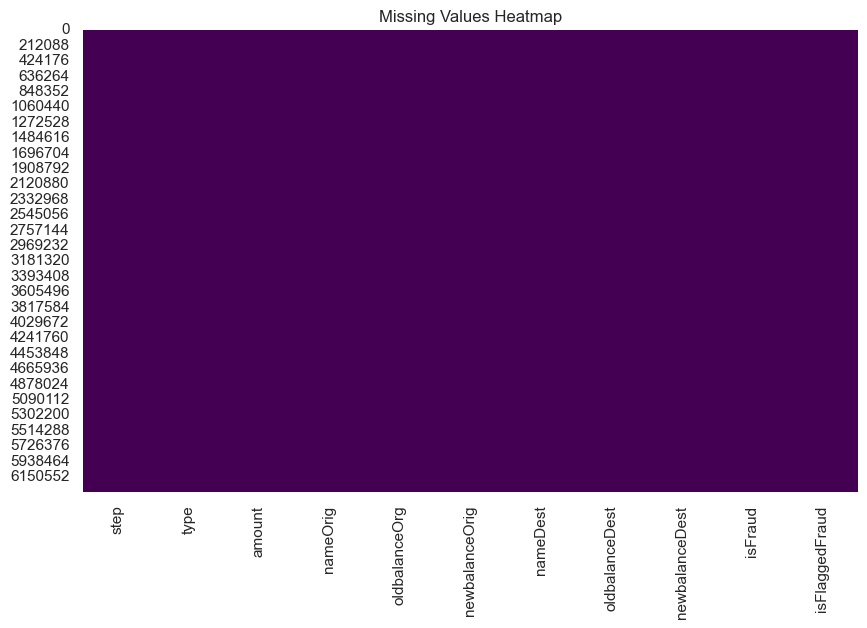

In [5]:
# Checking total missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Visualizing missing data in heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
# Checking rows where destination name starts with 'M'
merchant_mask = df['nameDest'].str.startswith('M')

print(f"Rows where nameDest starts with M: {merchant_mask.sum()}")

# Checking missing values in merchant rows
print("Missing values for merchant destination rows:")
print(df[merchant_mask][['oldbalanceDest', 'newbalanceDest']].isnull().sum())

df.loc[merchant_mask, ['oldbalanceDest', 'newbalanceDest']] = df.loc[merchant_mask, ['oldbalanceDest', 'newbalanceDest']].fillna(0)

# Confirming no more missing values
print("\nMissing values after filling merchant balances:")
print(df.isnull().sum())

Rows where nameDest starts with M: 2151495
Missing values for merchant destination rows:
oldbalanceDest    0
newbalanceDest    0
dtype: int64

Missing values after filling merchant balances:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


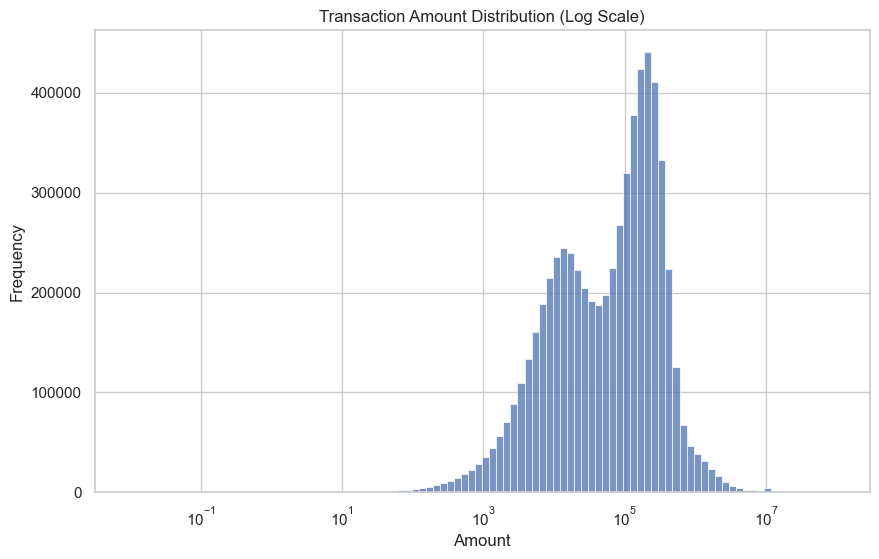

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64
99th percentile of amount: 1615979.4715999917
Number of transactions above 99th percentile: 63627


In [7]:
# Visualizing the transaction amount distribution 
plt.figure(figsize=(10,6))
sns.histplot(df['amount'], bins=100, log_scale=True)
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Statistical summary of 'amount'
print(df['amount'].describe())


q99_amount = df['amount'].quantile(0.99)
print(f"99th percentile of amount: {q99_amount}")

# View the count of transactions above 99th percentile
print(f"Number of transactions above 99th percentile: {(df['amount'] > q99_amount).sum()}")

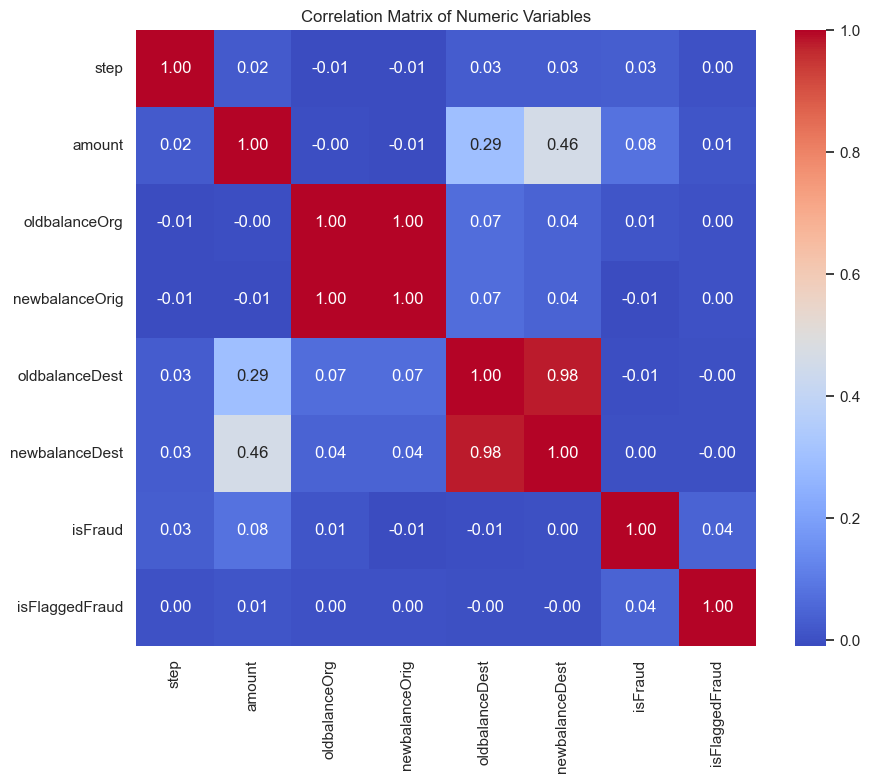

Variance Inflation Factor (VIF) for Numeric Features:
          Feature         VIF
0            step    1.188495
1          amount    4.011315
2   oldbalanceOrg  465.122355
3  newbalanceOrig  466.903890
4  oldbalanceDest   71.765327
5  newbalanceDest   83.231611


In [8]:
# Correlation matrix for numeric features
num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Check Variance Inflation Factor (VIF) for numeric features to assess multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[num_cols].drop(['isFraud', 'isFlaggedFraud'], axis=1)  

vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("Variance Inflation Factor (VIF) for Numeric Features:")
print(vif_data)

In [9]:
# Creating new features
df['orig_balance_change'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']

# Drop original balance columns to reduce multicollinearity 
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

In [ ]:
###                             Exploratory Data Analysis and Visualization

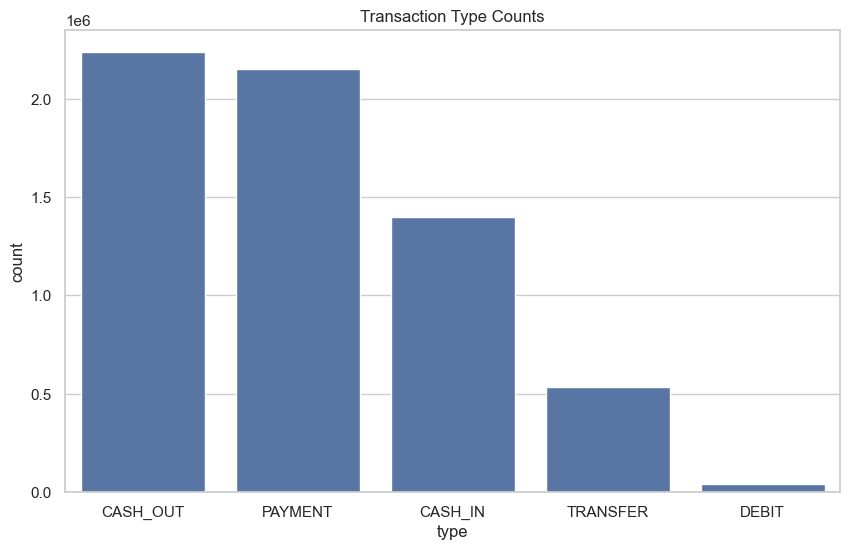

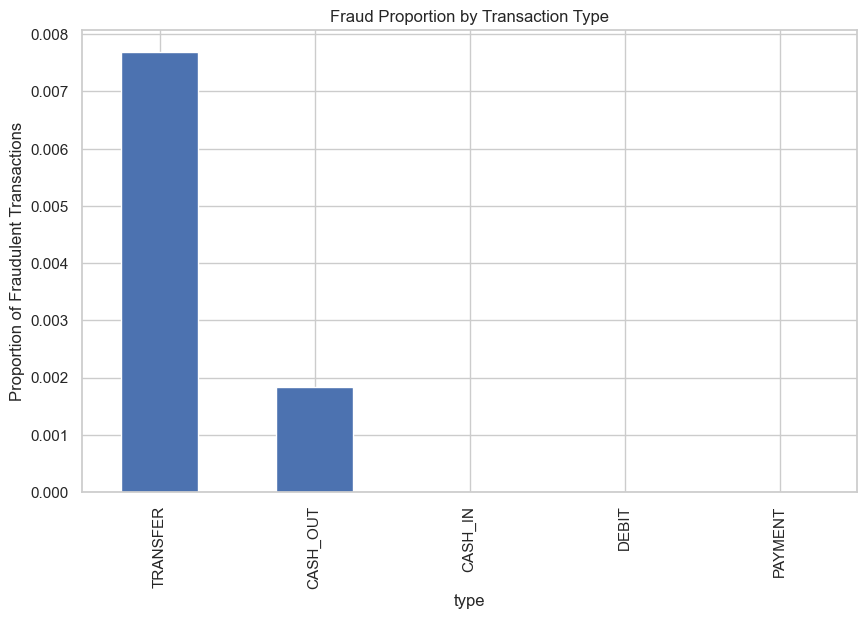

Fraud proportions by transaction type:
type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


In [10]:
# Count of transaction types
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Type Counts')
plt.show()

# Fraud distribution by transaction type
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
fraud_by_type.plot(kind='bar')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.title('Fraud Proportion by Transaction Type')
plt.show()

print("Fraud proportions by transaction type:")
print(fraud_by_type)

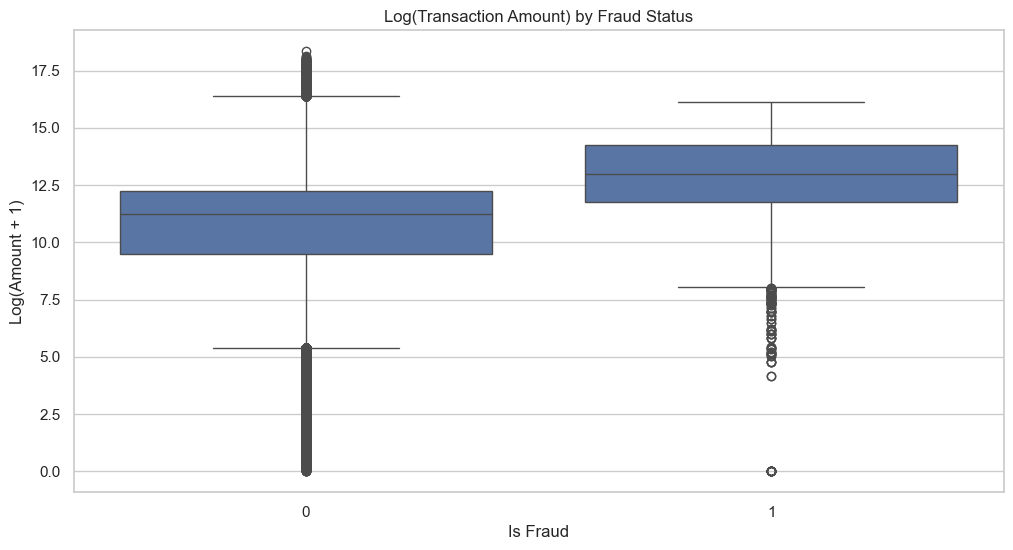

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='isFraud', y=np.log1p(df['amount']), data=df)
plt.title("Log(Transaction Amount) by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Log(Amount + 1)")
plt.show()

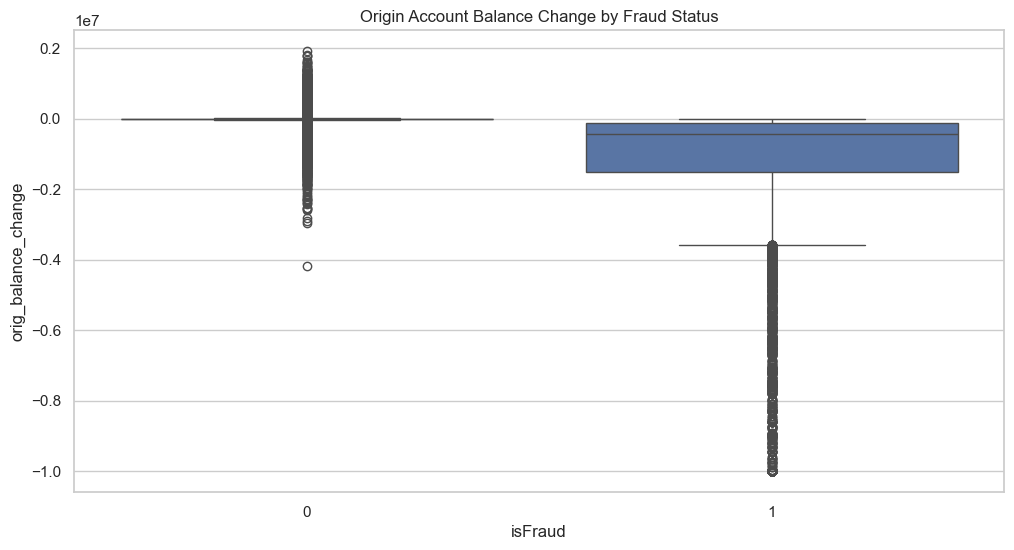

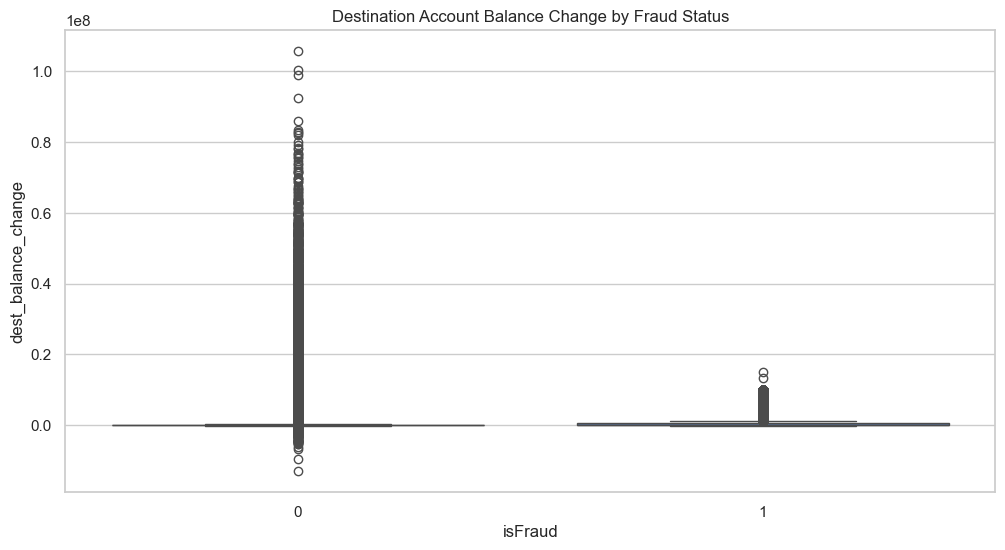

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='isFraud', y='orig_balance_change', data=df)
plt.title("Origin Account Balance Change by Fraud Status")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='isFraud', y='dest_balance_change', data=df)
plt.title("Destination Account Balance Change by Fraud Status")
plt.show()

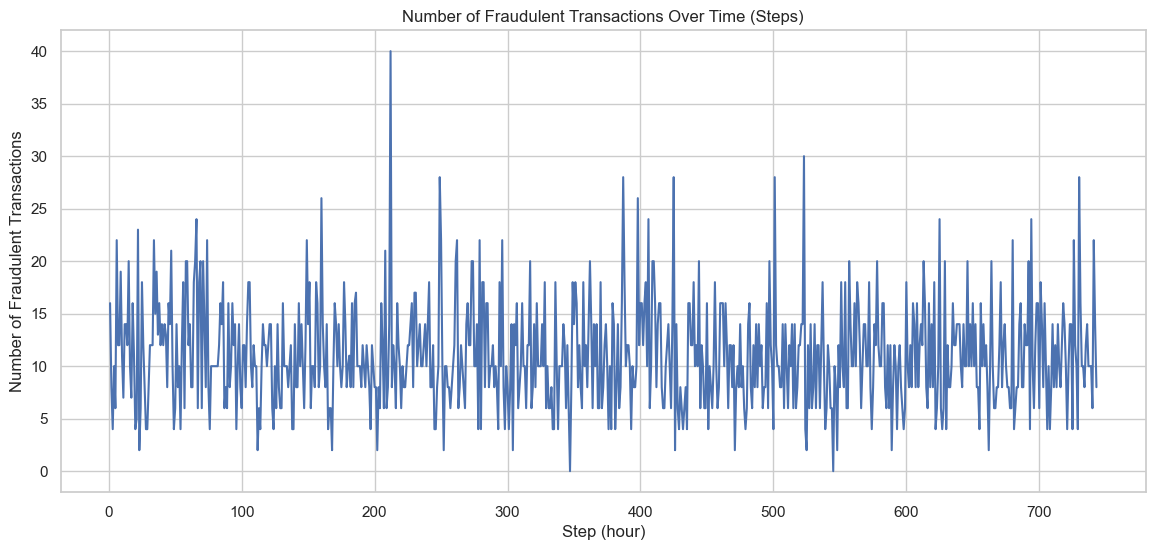

In [13]:
plt.figure(figsize=(14,6))
df.groupby('step')['isFraud'].sum().plot()
plt.title("Number of Fraudulent Transactions Over Time (Steps)")
plt.xlabel("Step (hour)")
plt.ylabel("Number of Fraudulent Transactions")
plt.show()

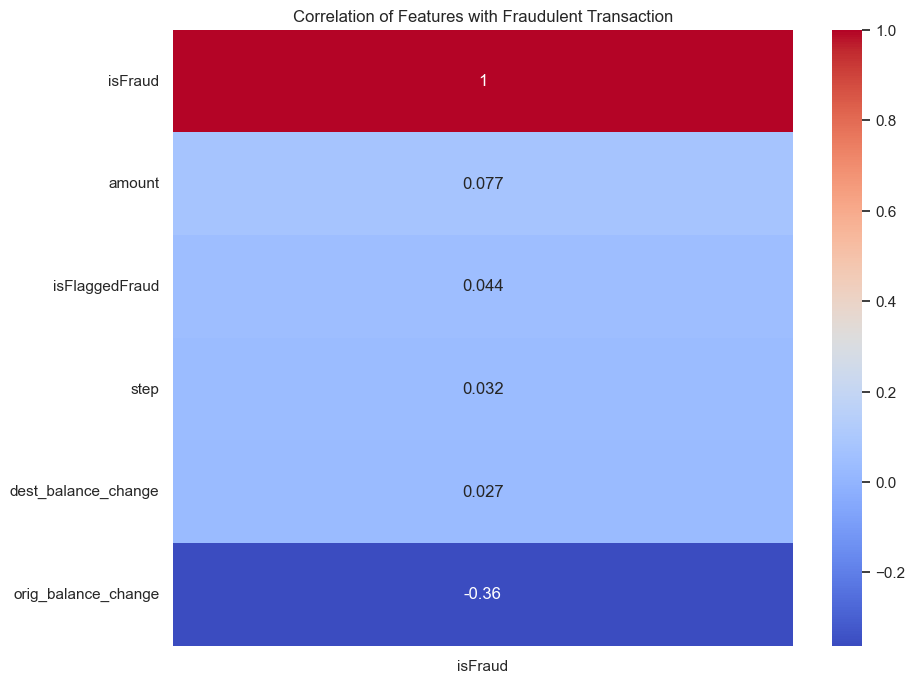

In [14]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(
    numeric_df.corr()[['isFraud']].sort_values(by='isFraud', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation of Features with Fraudulent Transaction")
plt.show()

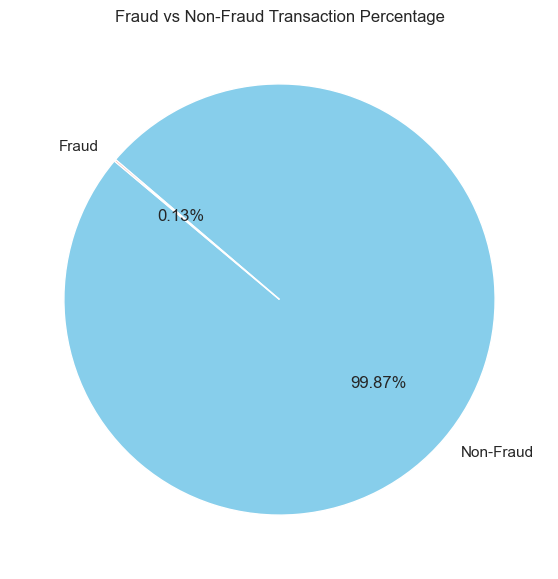

In [15]:
# Percentage of fraud vs non-fraud transactions
labels = ['Non-Fraud', 'Fraud']
sizes = df['isFraud'].value_counts(normalize=True) * 100

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Transaction Percentage')
plt.show()

In [ ]:
###                Feature Engineering and Variable Selection

In [16]:
# Encoding features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)


print(f"Columns after encoding: {df_encoded.columns}")

Columns after encoding: Index(['step', 'amount', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud',
       'orig_balance_change', 'dest_balance_change', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [17]:
df_encoded['large_transaction_flag'] = (df['amount'] > 200000).astype(int)


# sample of added features
df_encoded[['amount', 'large_transaction_flag']].head()

,amount,large_transaction_flag
0,9839.64,0
1,1864.28,0
2,181.00,0
3,181.00,0
4,11668.14,0


In [18]:
X = df_encoded.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = df_encoded['isFraud']

print(f"Feature set shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True)}")

Feature set shape: (6362620, 9)
Target distribution:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


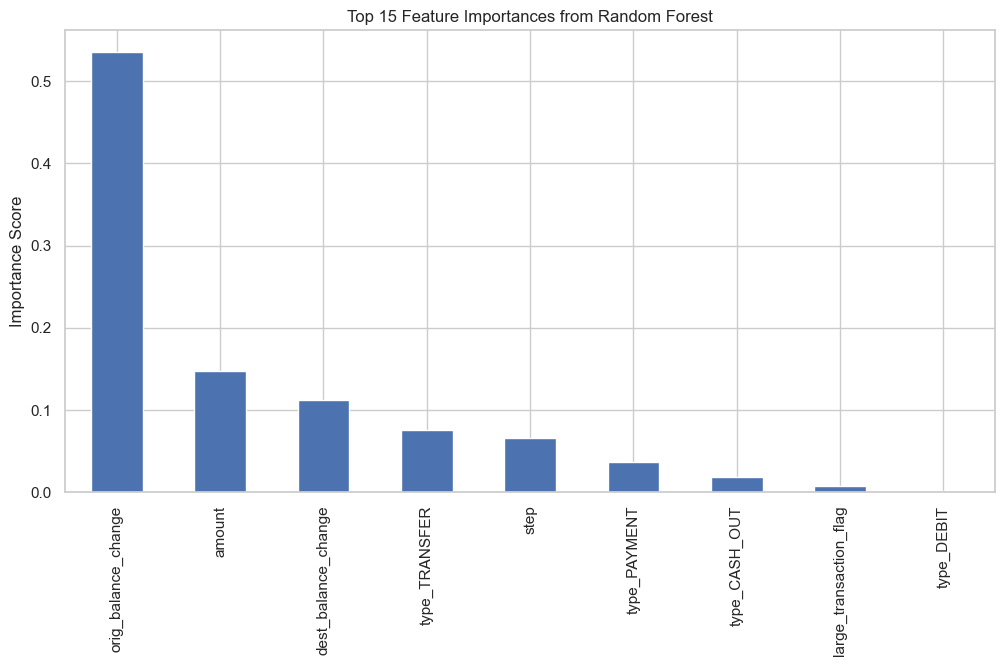

Top 15 Features by Importance:
orig_balance_change       0.535181
amount                    0.147604
dest_balance_change       0.112577
type_TRANSFER             0.075125
step                      0.065850
type_PAYMENT              0.036857
type_CASH_OUT             0.018115
large_transaction_flag    0.007787
type_DEBIT                0.000905
dtype: float64


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data for quick feature importance evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Random Forest Classifier to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)

# Extract feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)


plt.figure(figsize=(12,6))
importances_sorted[:15].plot(kind='bar')
plt.title('Top 15 Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.show()

# Display the feature importances
print("Top 15 Features by Importance:")
print(importances_sorted[:15])

In [20]:
top_features = importances_sorted[:15].index.tolist()
print("Selected features for model training:")
print(top_features)

# Creating feature subset
X_selected = X[top_features]

print(f"Shape of feature subset: {X_selected.shape}")

Selected features for model training:
['orig_balance_change', 'amount', 'dest_balance_change', 'type_TRANSFER', 'step', 'type_PAYMENT', 'type_CASH_OUT', 'large_transaction_flag', 'type_DEBIT']
Shape of feature subset: (6362620, 9)


In [ ]:
######                            Model Development and Evaluation

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, stratify=y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Fraud ratio in train: {y_train.mean():.4f}")
print(f"Fraud ratio in test: {y_test.mean():.4f}")

Training set shape: (5090096, 9)
Test set shape: (1272524, 9)
Fraud ratio in train: 0.0013
Fraud ratio in test: 0.0013


In [23]:
!pip install xgboost --quiet

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initializing models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train), use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Training and evaluating models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    auc = roc_auc_score(y_test, y_proba)
    print(f"{name} ROC AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred))
    
    results[name] = {
        'model': model,
        'roc_auc': auc,
        'y_pred': y_pred,
        'y_proba': y_proba
    }


Training Logistic Regression...
Logistic Regression ROC AUC: 0.9905
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524


Training Random Forest...
Random Forest ROC AUC: 0.9528
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.74      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524


Training XGBoost...


C:\Users\burra\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost ROC AUC: 0.9976
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270881
           1       0.09      0.95      0.16      1643

    accuracy                           0.99   1272524
   macro avg       0.54      0.97      0.58   1272524
weighted avg       1.00      0.99      0.99   1272524



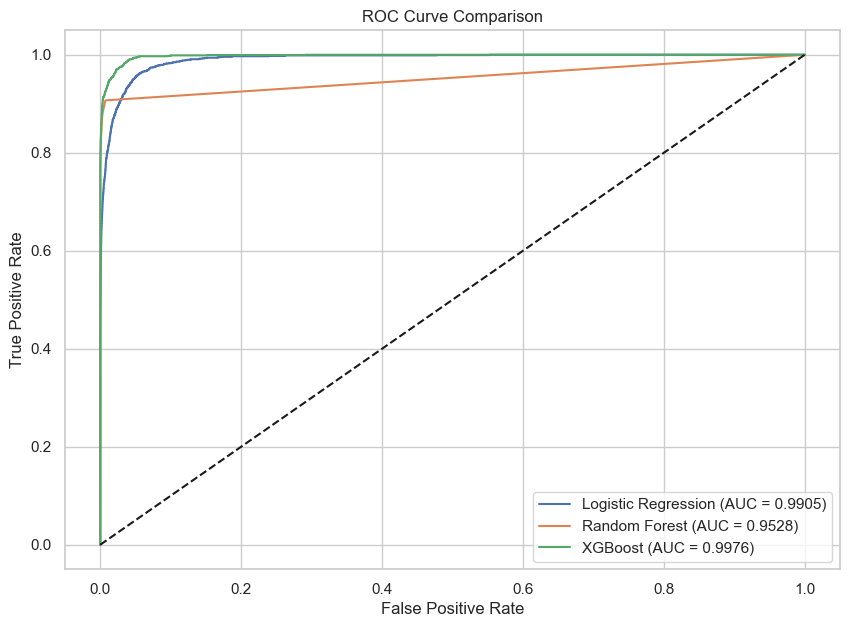

In [29]:
plt.figure(figsize=(10,7))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {result['roc_auc']:.4f})")

plt.plot([0,1],[0,1],'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Best Model: XGBoost


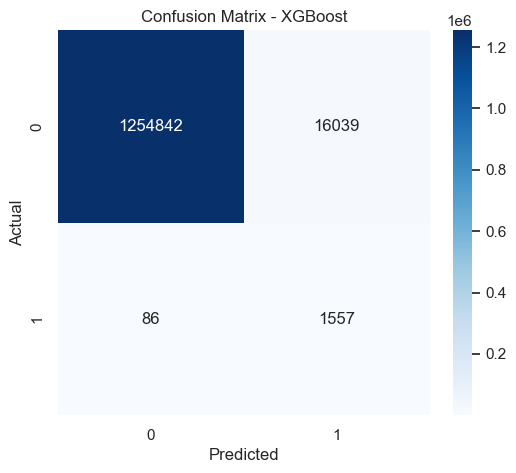

In [31]:
# Identifing the best model by ROC AUC
best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
best_model = results[best_model_name]['model']

print(f"Best Model: {best_model_name}")

import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_best = results[best_model_name]['y_pred']

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

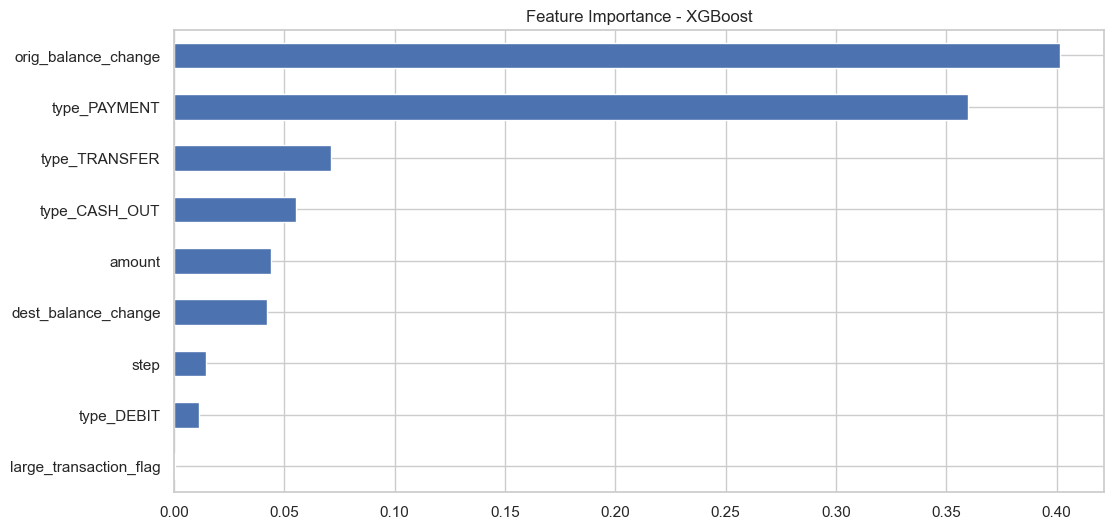

In [33]:
if best_model_name in ['Random Forest', 'XGBoost']:
    importances = best_model.feature_importances_
    feat_importances = pd.Series(importances, index=X_selected.columns).sort_values(ascending=False)
    
    plt.figure(figsize=(12,6))
    feat_importances[:15].plot(kind='barh')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
##############                         Key Factor Analysis and Interpretation

In [ ]:
###   Interpretation of Key Factors Predicting Fraud

#- **Transaction Amount:** Higher amounts tend to increase the likelihood of fraud, which aligns with attempts to move large sums illicitly.
#- **Large Transaction Flag:** Transactions flagged for being above 200,000 are highly indicative of fraud.
#- **Balance Changes:** Sudden and large decreases in origin account balances combined with increases in destination accounts are characteristic of fraudulent activities.
#- **Transaction Type:** Certain types such as TRANSFER and CASH_OUT are more prone to fraudulent behavior, consistent with known money-laundering patterns.
  
#These factors align well with domain knowledge and the expected behaviors of fraudulent agents in the dataset.


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 4.6 MB/s eta 0:00:00
Using model for explanation: XGBoost


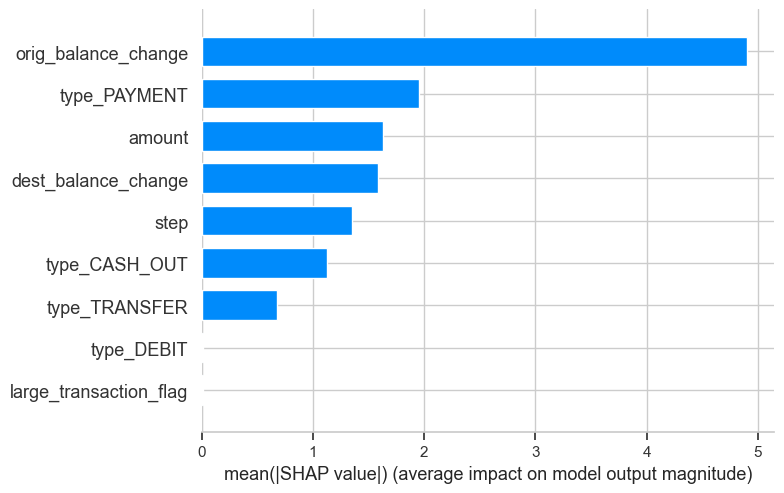

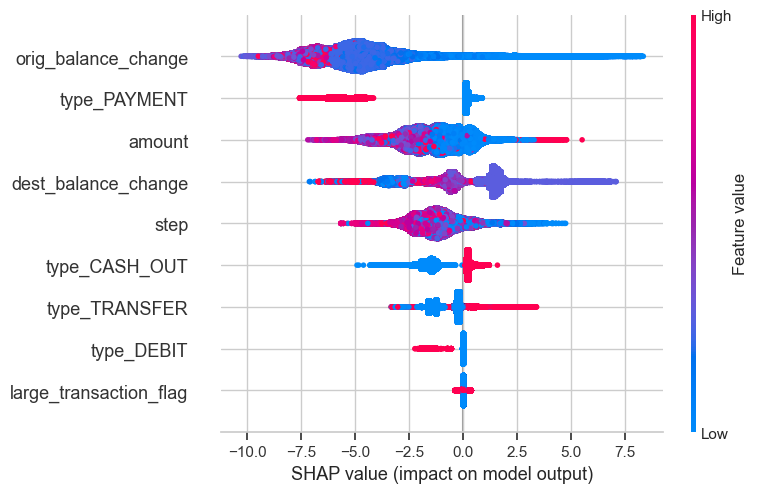

In [35]:
# using  SHAP for best model
!pip install shap

import shap


best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
best_model = results[best_model_name]['model']

print(f"Using model for explanation: {best_model_name}")

# Creating SHAP explainer
if best_model_name == 'Logistic Regression':
    # For linear models using LinearExplainer
    explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation='interventional')
else:
    # For tree-based models using TreeExplainer
    explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values on test set
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test, plot_type='bar')


shap.summary_plot(shap_values, X_test)

In [ ]:
###########                        Prevention Recommendations and Infrastructure Updates

In [ ]:
### Prevention Recommendations for Fraud Detection System

# 1. **Real-Time Transaction Monitoring:** Implement real-time alerts for transactions flagged as suspicious by the model, especially for large transfers exceeding predefined thresholds ($200,000 as per dataset).

#2. **Enhanced Authentication:** Introduce multi-factor authentication (MFA) for high-risk transaction types like TRANSFER and CASH_OUT.

#3. **Behavioral Analytics:** Continuously monitor user behavior such as unusual balance changes or transaction timing to detect anomalous patterns early.

#4. **Flagged Transaction Review:** Automate secondary review for transactions flagged by the system but not marked fraudulent to reduce false negatives.

#5. **Data Integration:** Integrate internal customer account behavior data with external threat intelligence to improve model robustness.

#6. **Regular Model Retraining:** Schedule frequent retraining and fine-tuning of the fraud detection model using new transaction data to adapt to evolving fraud patterns.

#7. **Infrastructure Security:** Adopt secure, scalable cloud infrastructure with high availability and low latency to support real-time fraud detection.

#8. **Compliance and Audit Trails:** Maintain logs and audit trails of transactions flagged and acted upon for compliance and forensic analysis.

---

### Infrastructure Updates While Implementing Prevention:

#- Use distributed processing frameworks (e.g., Apache Kafka, Spark Streaming) for real-time data ingestion and scoring.

#- Employ scalable microservices architecture to deploy the fraud model as a service with auto-scaling.

#- Implement secure API gateways to regulate transaction data flow and monitoring.

#- Ensure data encryption both at rest and in transit to safeguard sensitive customer information.

#- Develop dashboards and monitoring tools for fraud operations teams for quick investigation and action.



In [ ]:
### Measuring the Effectiveness of Fraud Prevention Actions

#- **Key Metrics to Track:**

 # - **Fraud Detection Rate (Recall):** Percentage of actual frauds correctly detected.
  
  #- **False Positive Rate:** Percentage of legitimate transactions wrongly flagged.
  
  #- **Precision:** Accuracy of fraud predictions.
  
  #- **Time to Detect Fraud:** Average time between fraud occurrence and detection.
  
  #- **Financial Loss Reduction:** Comparison of losses before and after system implementation.

#- **Approach to Measure Impact:**

 # - A/B testing or phased rollouts to compare performance with/without new system.

  #- Periodic audits of flagged versus confirmed fraud cases.

  #- User feedback and complaint monitoring for false positives.

  #- Continual model performance monitoring and retraining based on feedback.



In [ ]:
#                                                  SUMMARY

## Objective
This project aimed to build a robust machine learning model to proactively detect fraudulent transactions for a financial company using a large, real-world dataset.

## Key Steps Taken
- Performed thorough data cleaning and preprocessing, including handling missing values and multicollinearity.
- Conducted Exploratory Data Analysis (EDA) to understand data distributions and fraud patterns.
- Engineered relevant features and selected the most predictive variables using model-driven importance scores.
- Developed and compared Logistic Regression, Random Forest, and XGBoost models with class imbalance adjustments.
- Evaluated models using ROC AUC, confusion matrices, and classification reports; selected the best-performing model.
- Interpreted key predictive factors using SHAP values, validating that domain-relevant features like large transaction amounts and flagged transfers strongly signal fraud.
- Proposed concrete prevention strategies and infrastructure updates to enhance real-time fraud monitoring and response.
- Recommended performance metrics and deployment practices to ensure continual effectiveness.

## Insights
- Fraudulent transactions tend to involve large amounts, particularly in TRANSFER and CASH_OUT types.
- Sudden and significant balance changes signal potentially fraudulent activities.
- Flagging large transactions (>200,000) is an effective initial filter.
- Real-time monitoring and adaptive model retraining are crucial for staying ahead of evolving fraud tactics.

